# Artificial Neural Networks

## Outline

1. [Motivation](#motivation)
2. [Biological Inspiration](#bio)
3. [Simple model](#simple)
4. [Perceptron](#percep)
5. [NN Cost function](#cost)
6. [NN Hands on](#hands)

### Setup

In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn.datasets as datasets
import sklearn.model_selection as model_selection
np.random.seed(2104753)

<a id="motivation"></a>

# Motivation

Let's consider a highly non-linear classification task, like the one on the right

<div>
<img src="nn1.jpg" width="600"/>
</div

To obtain a decision boundary like the one plotted, one needs to introduce non-linear features in the form of quadratic and other higher order terms if using logistic regression

$$h(\theta)=g(\theta_0+\theta_1 x_1+\theta_2 x_2+\theta_3x_1x_2+\theta_4 x^2_1x_2+\ldots)$$

 or use highly non linear kernels with SVM

The number of terms in the hypotheses scales __exponentially__ with number of features $\rightarrow$ __high probability__ of overfitting the data

ANN are a sort of scaled up logistic regression. They are more difficult and computationally intensive to train but highly effective

Origins: Algorithms that try to mimic the brain.  
Was very widely used in 80s and early 90s; popularity diminished in late 90s.  
Recent resurgence: State-of-the-art technique for many applications. 
Technological factors lead to its success.

Remember class 1: factors leading to ML explosions.

See also: (1) Pandey, M.; Fernandez, M.; Gentile, F.; Isayev, O.; Tropsha, A.; Stern, A. C.; Cherkasov, A. The Transformational Role of GPU Computing and Deep Learning in Drug Discovery. Nat Mach Intell 2022, 4 (3), 211–221. https://doi.org/10.1038/s42256-022-00463-x.


An autonomous vehicle project based on ANN from the late '80s

<div>
    <img src="alvinn.png" width="400"/>
</div

ALVINN: AN AUTONOMOUS LAND VEHICLE IN A NEURAL NETWORK - Dean A. Pomerleau

<a id="one"></a>

# Biological Inspiration

- Analogy to biological neural systems  
- Attempt to understand natural biological systems through computational modeling  
- Massive parallelism allows for computational efficiency  (with current high-throughput architectures)
- Intelligent behavior as an “emergent” property of large number of simple units rather than from explicitly encoded symbolic rules and algorithms.

#### Basic algorithms

__Perceptron__: Initial algorithm for learning simple neural networks (single layer) developed in the 1950’s.  
__Backpropagation__: More complex algorithm for learning multi-layer neural networks developed in the 1980’s.

### One learning algorithm hypothesis

There is one basic algorithm that underlies most cortical perception processess; given different inputs, different parts of the cortex can learn to process them

<div>
<img src="nn2.png" width="600"/>
</div

<div>
<img src="nn3.png" width="600"/>
</div

<div>
<img src="nn4.png" width="600"/>
</div

<div>
<img src="nn5.png" width="600"/>
</div

- Neurons have a “switching time” on the order of a few milliseconds, compared to nanoseconds for current computing hardware.  
- However, neural systems can perform complex cognitive tasks (vision, speech understanding) in tenths of a second.  
- Only time for performing 100 serial steps in this time frame, compared to orders of magnitude more for current computers.  
- Must be exploiting “massive parallelism.”  
- Human brain has about $10^{11}$ neurons with an average of $10^4$ connections each.


- Electrical potential across cell membrane exhibits spikes called action potentials.  
- Spike originates in cell body, travels down axon, and causes synaptic terminals to release neurotransmitters.
- Chemical diffuses across synapse to dendrites of other neurons.
- Neurotransmitters can be excititory or inhibitory.
- If net input of neurotransmitters to a neuron from other neurons is excititory and exceeds some threshold, it fires an action potential.

<div>
<img src="nn6.png" width="400"/>
</div

### Real world learning

- Synapses change size and strength with experience.
- Hebbian learning: when two connected neurons are firing at the same time, the strength of the synapse between them increases.
- “Neurons that fire together, wire together.”

ANN where initially devised as a model to study the brain and later on became an applicable technique.

<a id="simple"></a>

## A simple model for neurons

Model network as a graph with cells as nodes and synaptic connections as weighted edges from node $i$ to node $j$, $w_{ji}$

A _graph_ $G(V,E)$ is a set of objects called _nodes_ or _vertexes_ joined by connections called _edges_. They are an abstraction used to represent many types of data including networks and molecules. Edges may have weights.

For instance the carbon atoms in a benzene molecule form an _undirected graph_ with same weight edges (1.5 if using bond orders) of _order_ 6

The topology of a graph may be represented by the _adjacency matrix_ $A_{ij}$; for a non weighted graph:
$$\begin{cases}
A_{ij} = 1\ \text{if}\ V_i\ \text{and}\ V_j\ \text{are connected} \\
A_{ij} = 0\ \text{otherwise}
\end{cases}$$

For example $A$ for the carbon atoms of a benzene ring is (if atoms are connected in clockwise order):
$$\mathbf{A} =  
\left[ {\begin{array}{cccccc}
    0   & 1.5 & 0   & 0   & 0   & 1.5 \\
    1.5 & 0   & 1.5 & 0   & 0   & 0   \\
    0   & 1.5 & 0   & 1.5 & 0   & 0   \\
    0   & 0   & 1.5 & 0   & 1.5 & 0   \\
    0   & 0   & 0   & 1.5 & 0   & 1.5 \\
    1.5 & 0   & 0   & 0   & 1.5 & 0   \\
\end{array}} \right]$$

(there are other matrices associated to an undirected graph such its _degree_ and _laplacian_ matrices)

ANNs are a form of _computational graph_ where each node corresponds to a computation and linked computations are joined by edges

#### Cell model:logistic unit

Model net input to cell as
$$ net_j = \sum_i w_{ji} a_i$$  
where $w_{ij}$ are the weights of the connections (synapses), $a_i$ the activations.

about notation: most references use a $\mathbf{w,x},b$ notation for SVM and perceptrons and so have I. It should be straighforward to use the $\theta,x$ notation adopted for regression as well.

Cell output is  
$$ o_j = \begin{align} 0\ \  & if & net_j \leq T_j \\ 1\ \  & if & net_j > T_j \end{align} $$
$T$ is the _Threshold_

<div>
<img src="neuron.png" width="400"/>
</div

Assume that supervised training examples yielding the desired output are available. The ouput of unit given a set of known input activations is known. 
Learn synaptic weights so that unit produces the correct output for each example. Stacking layers of multiple cell together we can build a network.

<div>
    <img src="ibm_deep_ann.png" width="400"/>
</div

<a id="percep"></a>

## Perceptron

The perceptron is a simple supervised machine learning algorithm and one of the earliest **neural network** architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a **binary linear classifier** that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. The Perceptron uses iterative update algorithm to learn a correct set of weights.

Given a training set of $m$ dimensional training examples $\in \mathbb{R}^n$ the Perceptron Learning Algorithm (PLA) tries to find a function which can predict labels.
The hypothesis function of the Perceptron is $h(\mathbf{x}) = sign(\mathbf{w}\mathbf{x})$ which is the equation of a _hyperplane_ (remember SVM).

More formally:   
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_n)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{-1,1\}$

The perceptron is a very simple neural network:
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(n)})$
- it has a real-valued bias $b$ ($x_0$)
- it uses the _Heaviside_ step function as its activation function: 
$$ H(x) = \begin{cases}
1\ & \text{if}\ x\gt 0\\
0\ & \text{if}\ x\leq 0\\
\end{cases}$$

Text(0.5, 1.0, 'Heaviside function')

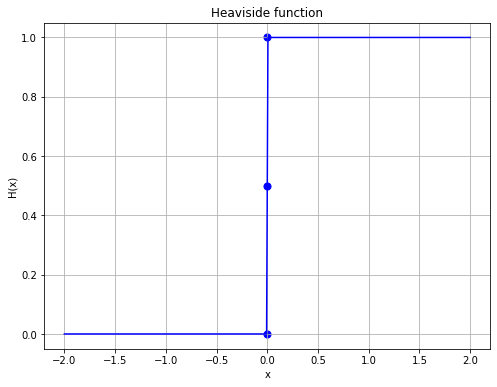

In [2]:
fig = plt.figure(figsize=(8,6))
x = np.linspace(-2,2,300)
y = np.zeros(x.shape[0])
y = np.where(x <= 0, 0, 1)
plt.plot(x,y,ls="-",c='b')
plt.grid()
plt.xlabel("x")
plt.ylabel("H(x)")
points = np.array(((0,0),(0,0.5),(0,1)))
plt.scatter(points[:,0],points[:,1],marker='o',s=50,c='b')
plt.title('Heaviside function')

A perceptron is trained using **subgradient descent** as $sign$ is not differentiable (btw this is true for SVM as well). After initialization (step 0) the other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0:** Initialize the weight vector and bias with zeros (or small random values).

**Step 1:** Compute a linear combination of the input features and weights:
$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b$

where $\boldsymbol{X}\in \mathbb{R}^{m\times n}$ is a matrix of shape $(m_{samples}, n_{features})$ that holds all training examples.

**Step 2:** Apply the Heaviside function _to each sample_; it returns binary values:

$\hat{y}^{(i)} = 1 \, \text{if} \, a^{(i)} \geq 0, \, \text{else} \, 0$

**Step 3:** Compute the weight updates using the perceptron learning rule

$$\begin{equation}
\Delta \boldsymbol{w} = \alpha \, \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)
\end{equation}$$
$$ \Delta b = \alpha \, \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big) $$

where $\alpha$ is the learning rate and $\hat{y}$ the true labels.

**Step 4:** Update the weights and bias
$$
\begin{equation}
\boldsymbol{w} = \boldsymbol{w} + \Delta \boldsymbol{w}
\end{equation}
$$
$$
b = b  + \Delta b
$$

<div>
<img src="nn9.png" width="600"/>
</div>

__Perceptron convergence theorem__: If the data is linearly separable and therefore a set of weights exist that are consistent with the data, then the Perceptron algorithm will eventually converge to a consistent set of weights.  
__Perceptron cycling theorem__: If the data is not linearly separable, the Perceptron algorithm will eventually repeat a set of weights and threshold at the end of some epoch and therefore enter an infinite loop. (check for repeated weights+threshold)

### Perceptron object

In [3]:
class Perceptron():
    def __init__(self,  learning_rate=0.05, maxEpochs=100):
        self.alpha = learning_rate
        self.maxEpochs = maxEpochs

    def train(self, X, y, weights=False, bias=0):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        if not np.any(weights):
            self.weights = np.random.rand(n_features,1)
        else:
            self.weights = np.copy(weights)
        self.bias = bias

        for i in range(self.maxEpochs):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias
            # Step 2: Compute the output
            y_predict = self._step_function(a)
        
            # Step 3: Compute weight updates
            delta_w = self.alpha * np.dot(X.T, (y - y_predict))
            delta_b = self.alpha * np.sum(y - y_predict)
            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias
    
    def _step_function(self, x):
        pass

    def predict(self, X):
        pass

### Exercise 1

1. Why the np.copy? 
2. Implement the `predict` and `step_function` methods.
3. Add way to check for convergence.

<div>
<img src="gears.png" width="400"/>
</div>

### Solution

In [4]:
class Perceptron():
    def __init__(self,  learning_rate=0.05, maxEpochs=100, conv=1e-5):
        self.alpha = learning_rate
        self.maxEpochs = maxEpochs
        self.conv = conv

    def train(self, X, y, weights=False, bias=0):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        if not np.any(weights):
            self.weights = np.random.rand(n_features,1)
        else:
            self.weights = np.copy(weights)
        self.bias = bias
        self.error = list()

        for i in range(self.maxEpochs):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias

            # Step 2: Compute the output
            y_predict = self._step_function(a)
            self.error.append(100.*(len(np.where(y_predict!=y)[0])/n_samples))
            
            # Step 3: Compute weight updates
            delta_w = self.alpha * np.dot(X.T, (y - y_predict))
            delta_b = self.alpha * np.sum(y - y_predict)
            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b
            if np.all(delta_w)<self.conv and delta_b<self.conv:
                break            
        self.max_train = i
        return self.weights, self.bias

    def _step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self._step_function(a)

### Dataset

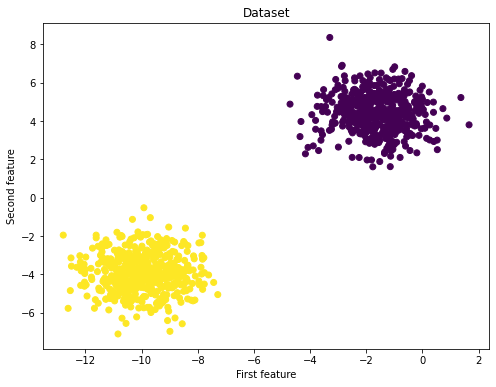

In [5]:
X, y = datasets.make_blobs(n_samples=1000, centers=2, random_state=1)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [6]:
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y_true, test_size=0.25,shuffle=True, random_state=1)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


### Training

In [7]:
w0 = np.array((-1.,1.))[:, np.newaxis]
b0 = -6
p = Perceptron(learning_rate=0.01, maxEpochs=100)
w_trained, b_trained = p.train(X_train, y_train, weights=w0, bias=b0)

In [8]:
w_trained, b_trained, p.max_train

(array([[-11.39540489],
        [-17.90197315]]),
 -6.659999999999993,
 38)

### Testing

In [9]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


In [10]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(np.min(X[:,0]),np.max(X[:,0]),10)
    y_hyperplane = slope * x_hyperplane + intercept
    return x_hyperplane, y_hyperplane

Text(0.5, 0, 'steps')

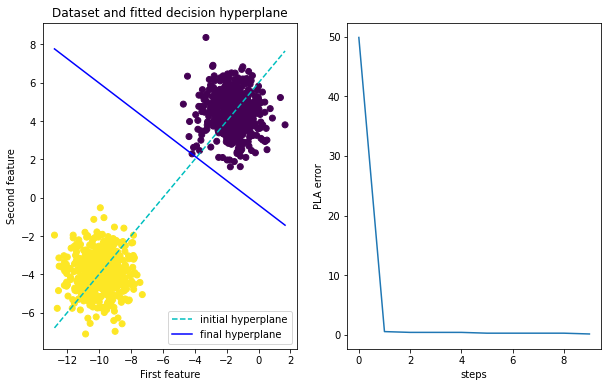

In [11]:
fig = plt.figure(figsize=(10,6))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=y)
x_1, y_1 = plot_hyperplane(X, y, w0, b0)
plt.plot(x_1, y_1, '--',c='c',label='initial hyperplane')
x_hyperplane, y_hyperplane = plot_hyperplane(X, y, w_trained, b_trained)
plt.plot(x_hyperplane, y_hyperplane, '-',c='b',label='final hyperplane')
plt.title("Dataset and fitted decision hyperplane")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()
plt.subplot(122)
plt.plot( p.error[:10])
plt.ylabel('PLA error')
plt.xlabel('steps')

The plots shows that the Perceptron learns quickly from the train data set but fails to generalize stopping
as soon as possible. The maximum margin sought after with SVM is a generalization

### Alternative implementation

Just as we used only the support vectors in SVM we may try to focus on misclassified points at any given moment

In [12]:
# to compare with previous results
xo, yo = x_hyperplane, y_hyperplane

In [13]:
class Perceptron2():
    def __init__(self,  learning_rate=0.05, maxEpochs=100, conv=1e-5):
        self.alpha = learning_rate
        self.maxEpochs = maxEpochs
        self.conv = conv

    def train(self, X, y, weights=False, bias=0):
        n_samples, n_features = X.shape
        xlabels = np.arange(n_samples)

        # Step 0: Initialize the parameters
        if not np.any(weights):
            self.weights = np.random.rand(n_features,1)
        else:
            self.weights = np.copy(weights)
        self.bias = bias
        self.error = list()

        for i in range(self.maxEpochs):
            delta_w = np.array((0.,0.))
            delta_b = 0
            error=0.
            np.random.shuffle(xlabels)
            for j in xlabels:
                # Step 1: Compute the activation
                a = np.dot(X[j], self.weights) + self.bias

                # Step 2: Compute the output
                y_predict = self._heaviside(a)
                if y_predict == y[j]:
                    continue
                else:
                    error = error+1.
            
                    # Step 3: Compute weight updates
                    delta_w += self.alpha * np.dot(X[j][:, np.newaxis,], (y[j] - y_predict))
                    delta_b += self.alpha * (y[j] - y_predict)
                    # Step 4: Update the parameters
                    self.weights += delta_w
                    self.bias += delta_b
            self.error.append(error)
            if np.all(delta_w)<self.conv and delta_b<self.conv:
                break    
        self.max_train = i
        return self.weights, self.bias
    
    def _heaviside(self,a):
        return (1 if a>0 else 0)

    def _step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self._step_function(a)

### Training

In [14]:
# w0 has a different number of axes; 
p2 = Perceptron2(learning_rate=0.01, maxEpochs=100)
w_trained, b_trained = p2.train(X_train, y_train, weights=np.squeeze(w0), bias=b0)

In [15]:
w_trained, b_trained, p2.max_train

(array([-1.11965129,  0.0063819 ]), array([-6.07]), 1)

### Testing

In [16]:
y_p_train = p2.predict(X_train)
y_p_test = p2.predict(X_test)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


In [17]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(np.min(X[:,0]),np.max(X[:,0]),10)
    y_hyperplane = slope * x_hyperplane + intercept
    return x_hyperplane, y_hyperplane

Text(0.5, 0, 'steps')

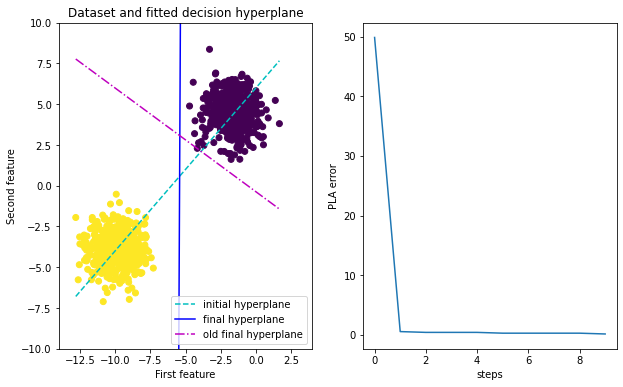

In [18]:
fig = plt.figure(figsize=(10,6))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=y)
x_1, y_1 = plot_hyperplane(X, y, np.squeeze(w0), b0)
plt.plot(x_1, y_1, '--',c='c',label='initial hyperplane')
x_hyperplane, y_hyperplane = plot_hyperplane(X, y, w_trained, b_trained)
plt.plot(x_hyperplane, y_hyperplane, '-',c='b',label='final hyperplane')
plt.plot(xo, yo, '-.',c='m',label='old final hyperplane')
plt.title("Dataset and fitted decision hyperplane")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()
plt.xlim(-14,4)
plt.ylim(-10,10)
plt.subplot(122)
plt.plot( p.error[:10])
plt.ylabel('PLA error')
plt.xlabel('steps')

<a id="cost"></a>

# NN: cost function

#### Cell model:logistic unit

very often a sigmoid activation function is used:
$$ g(z) = \frac{1}{1+e^{-z}}$$

Text(0, 0.5, 'g(z)')

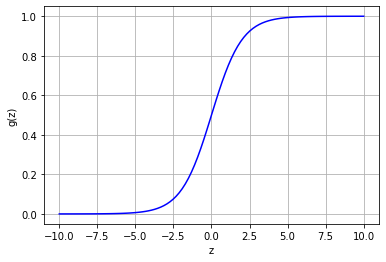

In [19]:
z = np.linspace(-10,10,100)
g = 1. / (1.+np.exp(-z))
plt.plot(z, g, ls="-",c='b')
plt.grid()
plt.xlabel('z')
plt.ylabel('g(z)')

- $L$ = total number of layers in network
- $s_j$ = number of nodes in layer $j$

Binary classification: $y \in {0,1}$
1 output unit

Multiclass classification: $K$ classes $\to K$ output units

Suppose we have a network with one input layer (2 features), 3 nodes in the __second hidden__ layer and one output layer (a binary classification). Activation in the __second__ layer ($z^{\mathbf{2}}$):  
$$\begin{align}
z_1^{(2)} &=&  g(W_{10}^1 x_0 + W_{11}^1 x_1 + W_{12}^1 x_2+ W_{13}^1 x_3) \\
z_2^{(2)} &=&  g(W_{20}^1 x_0 + W_{21}^1 x_1 + W_{22}^1 x_2+ W_{23}^1 x_3) \\
z_3^{(2)} &=&  g(W_{30}^1 x_0 + W_{31}^1 x_1 + W_{32}^1 x_3+ W_{33}^1 x_3) 
\end{align}$$

If network has $s_l$ units in layer $l$ and $s_{l+1}$ units in layer $l+1$ then the connections $W^{(l)}$ connecting the layers
will be of dimensions $s_l \times s_{l+1}$

<div>
<img src="network.png" width="300"/>
</div

The inputs from one hidden layer to the next one are, for the latter, just another set of features in a _potentially_ different space (the number of nodes is not fixed across layers). The ANN is __learning its own features__ for the problem.

**Cost function**

Logistic regression (a.k.a. binary cross entropy):

$$ J(w) = -\frac{1}{m} [\sum_{i=1}^m y^{(i)} log h_w (x^{(i)}) + (1-y^{(i)}) log (1-h_w (x^{(i)}))] + \frac{\lambda}{2 m}\sum_{j=1}^n w_j^2 $$
($\theta\rightarrow w$)

Network with $L$ total layers ($L-2$ hidden) and, M (i. e. $x\in \mathbb{R}^M$) input units $K$ output units (i. e. $y\in \mathbb{R}^K$); $s_l$ nodes in any layer (excluding bias).

The output is $ h_W(x) \in \mathbb{R}^K$ and the output of a single node is $h_W(x^{(i)}) = i^{th}$

$$ J(W) = -\frac{1}{m} [\sum_{i=1}^m \sum_{k=1}^K y^{(i)}_k log(h_w (x^{(i)}))_k + (1-y^{(i)}_k) log (1-h_w (x^{(i)}_k)) + \frac{\lambda}{2 m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}} (W_{ij}^{(l)})^2 ]$$

### Training the net

We need to find 
$$ \min_{W} J(W)$$
and hence need to compute  
$$ -\frac{J(W)}{W_{ij}^{(l)}}\ \text{with}\ W^{(l)}\in \mathbb{R}^{s_l\times s_{l+1}}$$

The derivative of a sigmoid unit $g(z)=(1+e^{-z})^{-1}$ with respect to net input is:
$$ \frac{\partial o_j}{\partial net_j} = o_j (1-o_j) $$
and we use the gradient descent learning rule

<div>
<img src="ibm_deep_ann_2.png" width="400"/>
</div>

### Training

Let's understand what happens with a __trained__ network. Suppose we have a simple linear network like this:

<div>
<img src="network3.png" width="400"/>
</div

To train the network we need to optmized the cost function i. e. minimize it w. r. t. the weights in the layers. Assume that for the outer layer we use the perceptron learning rule:
$$\begin{align}
\Delta W = & \alpha X\cdot(\hat{y}- y) \\
W = & W + \Delta W
\end{align}$$

we need to apply the chain rule to have the derivatives of J back to the input layer weights. The derivative w. r. t. activation and output for a neuron _in the external layer_ is:

$$\begin{align}
\frac{\partial}{\partial w^{(2)}_j} J = &  -\frac{1}{m} \sum_{i=1}^{m}[ y^{(i)}log(h_i) + (1-y^{(i)})log(1-h_i)]\\
= & -\frac{1}{m} \sum_{i=1}^{m}[ y^{(i)}\frac{h_i^{\prime}}{h_i} + (1-y^{(i)})\frac{-1}{1-h_i}h_i^{\prime}] \\
= & -\frac{1}{m} \sum_{i=1}^{m}[ y^{(i)}\frac{h_i(1-h_i)}{h_i} +(y^{(i)}-1)\frac{1}{1-h_i}h_i(1-h_i)] \\
= & -\frac{1}{m} \sum_{i=1}^{m}[ y^{(i)}(1-h_i)+(y^{(i)}-1)h_i \\
= & -\frac{1}{m} \sum_{i=1}^{m}[ y^{(i)} - y^{(i)}h_i+y^{(i)}h_i-h_i]\\
= & \frac{1}{m} \sum_{i=1}^{m}[(h_i- y^{(i)})o_j^{(2)}]
\end{align}$$

$J$ for a node depends on $a$ which depends on $z$ which depends on incoming inputs and weigths. Decomposing in $a\rightarrow z\rightarrow (w,x)$ ($w$ is any one weight) this is:
$$ \frac{\partial J}{\partial w^{(L)}} = \frac{\partial J}{\partial a^{(L)}}\frac{\partial a^{(L)}}{\partial z^{(L)}}\frac{\partial z^{(L)}}{\partial w^{(L)}} $$

For a hidden layer $L-1$:
$$\frac{\partial J}{\partial  w^{(L-1)}} = \frac{\partial J}{\partial a^{(L)}}\frac{\partial a^{L}}{\partial z^{(L)}}\frac{\partial z^{L}}{\partial a^{(L-1)}} $$

noting that for hidden layer multiple activations depends on the same weight so there will a sum of contributions; if we have two nodes in the external layer

$$\frac{\partial J}{\partial  w_11^{(L-1)}} = \big(\frac{\partial J}{\partial a_1^{(L)}}\frac{\partial a_1^{L}}{\partial z_1^{(L)}}\frac{\partial z_1^{L}}{\partial a_1^{(L-1)}} +\frac{\partial J}{\partial a_2^{(L)}}\frac{\partial a_2^{L}}{\partial z_2^{(L)}}\frac{\partial z_2^{L}}{\partial a_1^{(L-1)}}\big)
\big(\frac{\partial a_1{(L-1)}}{\partial z_1^{(L-1)}}\frac{\partial z_1{(L-1)}}{\partial w_1^{(L-1)}}\big)$$

Generalizing, it can be shown that 
$$ \frac{\partial J}{\partial  W^{(l)}} = (\delta^{(l+1)})\cdot W^{(l+1)} \odot \frac{\partial A^{(l)}}{\partial  Z^{(l)}}\odot X^{(l-1)}$$  
where  
$$\delta^L =  \frac{\partial J}{\partial  A^{(l)}}\odot  \frac{\partial A^{(l)}}{\partial  Z^{(l)}}$$

where $\odot$ is the [Hadamard product](#https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) i. .e elementwise multiplication

### Backpropagation

**Example**
- Create a 3-layer network with H hidden units with full connectivity  between layers. Set weights to small random real values.
- Until all training examples produce the correct value (within a tolerance $\epsilon$), or cost fnuction ceases to decrease, or other termination criteria:
        -Begin epoch
        -For each training example, d, do:
             Calculate network output for d’s input values 
             Compute error between current output and correct output for d
             Update weights by backpropagating error and using learning rule
        -End epoch

- Not guaranteed to converge to zero training error, may converge to local optima or oscillate indefinitely.  
- Usually does converge to low error for many large networks on real data.  
- Many epochs (thousands) may be required.  
- To avoid local-minima problems, run several trials starting with different random weights (random restarts).  

<a id="hands"></a>

## NN hands on

Map $2$ dimensional input vectors onto binary output values. Use $2$ input neurons, one hidden layer with $6$ hidden neurons and an output layer with $1$ output neuron. 

The weight matrix between the input and hidden layer will be denoted as $W_h$, the weight matrix between the hidden and output layer as $W_o$. In addition to the weights connecting the neurons, each hidden and output neuron will have a bias weight with a constant input of $+1$.

Our training set consists of $m = 750$ examples. Therefore, we will have the following matrix shapes:
- Training set shape: $X = (750, 2)$
- Targets shape: $Y = (750, 1)$
- $W_h$ shape: $(n_{features}, n_{hidden}) = (2, 6)$
- $b_h$ shape (bias vector): $(1, n_{hidden}) = (1, 6)$ 
- $W_o$ shape: $(n_{hidden}, n_{outputs}) = (6, 1)$
- $b_o$ shape (bias vector): $(1, n_{outputs}) = (1, 1)$ 

<div>
<img src="network2.png" width="400"/>
</div>

Start by computing the activation and output of each unit in our network. Use the following notation:

- $\boldsymbol{Z}_h$: matrix with activations of all hidden units for all training examples
- $\boldsymbol{A}_h$: matrix with outputs of all hidden units for all training examples


The hidden neurons will have _hyperbolic tangent_ $\tanh$ as their activation function:
\begin{equation}
\tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{\exp(x) - exp(-x)}{\exp(x) + exp(-x)}
\end{equation}
\begin{equation}
\tanh'(x) = 1 - tanh^2(x)
\end{equation}

The output neurons will have the $\textit{sigmoid}$ activation function:
\begin{equation}
\sigma(x) = \frac{1}{1 + \exp(-x)}
\end{equation}
\begin{equation}
\sigma'(x) = 1 - (1 + \sigma(x))
\end{equation}

Text(0, 0.5, 'g(z)')

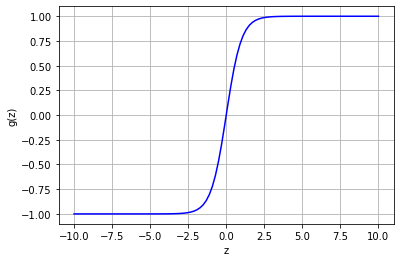

In [20]:
z = np.linspace(-10,10,100)
g = np.tanh(z)
plt.plot(z, g, ls="-",c='b')
plt.grid()
plt.xlabel('z')
plt.ylabel('g(z)')

The activations and outputs can then be computed as follows:
$$ \begin{equation}
Z_h = X \cdot W_h + b_h, \text{shape: } (750, 6)
\end{equation} $$

$$ \begin{equation}
A_h = \text{tanh}(Z_h), \text{shape: } (750, 6)
\end{equation} $$

$$\begin{equation}
Z_o = A_h \cdot W_o + b_o, \text{shape: } (750, 1)
\end{equation}$$

$$\begin{equation}
A_o = \sigma(Z_o), \text{shape: } (750, 1)
\end{equation}$$

#### Backward pass

To compute the weight updates we need the partial derivatives of the cost function with respect to each unit. 
For the output neurons, the gradients are given by (matrix notation):  

$\frac{\partial J}{\partial Z_o} = dZ_o = (A_o - Y)$  

$\frac{\partial J}{\partial W_o} = \frac{1}{m} (A_h^T \cdot dZ_o)$  "hidden layer features"

$\frac{\partial J}{\partial b_o} = \frac{1}{m} \sum dZ_o$  

For the weight matrix between input and hidden layer we have:  
$\frac{\partial J}{\partial Z_h} = dZ_h = (W_o^T \cdot dZ_o) * (1 - \tanh^2 (Z_h))$  

$\frac{\partial J}{\partial W_h} = \frac{1}{m} (X^T \cdot dZ_h)$  

$\frac{\partial J}{\partial b_h} = \frac{1}{m} \sum dZ_h$  

#### Weight Update with the perceptron learning rule

$W_h = W_h - \alpha * \frac{\partial J}{\partial W_h}$  

$b_h = b_h - \alpha * \frac{\partial J}{\partial b_h} $  

$W_o = W_o - \alpha *   \frac{\partial J}{\partial W_o} $  

$b_o = b_o - \alpha *  \frac{\partial J}{\partial b_o} $  


### Dataset

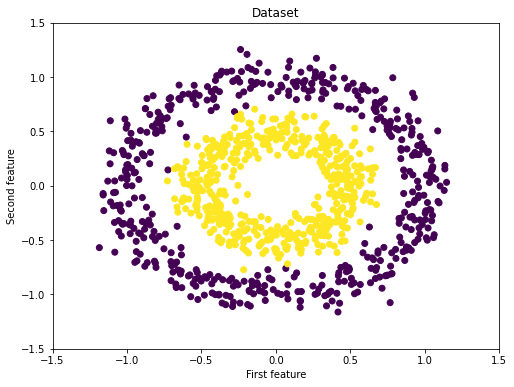

In [21]:
X, y = datasets.make_circles(n_samples=1000, factor=0.5, noise=.1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [22]:
# reshape targets to get column vector with shape (n_samples, 1)
y_true = y[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y_true, test_size=0.25,shuffle=True, random_state=1)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


## NN class

In [23]:
class NeuralNet():
    
    def __init__(self, n_inputs, n_outputs, n_hidden):
        # create net topology
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.hidden = n_hidden

        # Initialize weight matrices and bias vectors
        self.W_h = np.random.randn(self.n_inputs, self.hidden)
        self.b_h = np.zeros((1, self.hidden))
        self.W_o = np.random.randn(self.hidden, self.n_outputs)
        self.b_o = np.zeros((1, self.n_outputs))

    def _sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def _forward_pass(self, X):
        """
        Propagates the given input X forward through the net.

        Returns:
            A_h: matrix with activations of all hidden neurons for all input examples
            O_h: matrix with outputs of all hidden neurons for all input examples
            A_o: matrix with activations of all output neurons for all input examples
            O_o: matrix with outputs of all output neurons for all input examples
        """
        # Compute activations and outputs of hidden units
        Z_h = np.dot(X, self.W_h) + self.b_h
        A_h = np.tanh(Z_h)

        # Compute activations and outputs of output units
        Z_o = np.dot(A_h, self.W_o) + self.b_o
        A_o = self._sigmoid(Z_o)

        outputs = {
                "Z_h": Z_h,
                "Z_o": Z_o,
                "A_h": A_h,
                "A_o": A_o,
                }

        return outputs

    def _backward_pass(self,  X, Y, n_samples, outputs):
        """
        Propagates the errors backward through the net.

        Returns:
            dW_h: partial derivatives of cost function w.r.t hidden weights
            db_h: partial derivatives of cost function w.r.t hidden bias
            dW_o: partial derivatives of cost function w.r.t output weights
            db_o: partial derivatives of cost function w.r.t output bias
        """
        pass

    def _update_weights(self, gradients, alpha):
        """
        Updates the model parameters using a fixed learning rate
        """
        pass

    def _cost(self, y_true, y_predict, n_samples):
        """
        Computes and returns the cost over all examples
        """
        # same cost function as in logistic regression
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        # remove unused axes
        cost = np.squeeze(cost)
        assert isinstance(cost, float)
        return cost
    
    def train(self, X, y, n_iters=500, alpha=0.3):
        """
        Trains the neural net on the given input data
        """
        n_samples, _ = X.shape

        for i in range(n_iters):
            outputs = self._forward_pass(X)
            cost = self._cost(y, outputs["O_o"], n_samples=n_samples)
            gradients = self._backward_pass(X, y, n_samples, outputs)

            if i % 100 == 0:
                print(f'Cost at iteration {i}: {np.round(cost, 4)}')

            self._update_weights(gradients, alpha)

    def predict(self, X):
        """
        Computes and returns network predictions for given dataset
        """
        outputs = self._forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["O_o"]]
        return np.array(y_pred)[:, np.newaxis]

### Exercise 3
Implement the `backward pass` and `update_weights` methods.

<div>
<img src="gears.png" width="400"/>
</div>

### Solution 

In [30]:
class NeuralNet():
    
    def __init__(self, n_inputs, n_outputs, n_hidden):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.hidden = n_hidden

        # Initialize weight matrices and bias vectors
        self.W_h = np.random.randn(self.n_inputs, self.hidden)
        self.b_h = np.zeros((1, self.hidden))
        self.W_o = np.random.randn(self.hidden, self.n_outputs)
        self.b_o = np.zeros((1, self.n_outputs))

    def _sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def _forward_pass(self, X):
        """
        Propagates the given input X forward through the net.

        Returns:
            A_h: matrix with activations of all hidden neurons for all input examples
            O_h: matrix with outputs of all hidden neurons for all input examples
            A_o: matrix with activations of all output neurons for all input examples
            O_o: matrix with outputs of all output neurons for all input examples
        """
        # Compute activations and outputs of hidden units
        Z_h = np.dot(X, self.W_h) + self.b_h
        A_h = np.tanh(Z_h)

        # Compute activations and outputs of output units
        Z_o = np.dot(A_h, self.W_o) + self.b_o
        A_o = self._sigmoid(Z_o)

        outputs = {
                "Z_h": Z_h,
                "Z_o": Z_o,
                "A_h": A_h,
                "A_o": A_o,
                }

        return outputs

    def _cost(self, y_true, y_predict, n_samples):
        """
        Computes and returns the cost over all examples
        """
        # same cost function as in logistic regression
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        # remove unused axes
        cost = np.squeeze(cost)
        assert isinstance(cost, float)
        return cost

    def _backward_pass(self,  X, Y, n_samples, outputs):
        """
        Propagates the errors backward through the net.

        Returns:
            dW_h: partial derivatives of cost function w.r.t hidden weights
            db_h: partial derivatives of cost function w.r.t hidden bias
            dW_o: partial derivatives of cost function w.r.t output weights
            db_o: partial derivatives of cost function w.r.t output bias
        """

        dZ_o = (outputs["A_o"] - Y)
        dW_o = (1 / n_samples) * np.dot(outputs["A_h"].T, dZ_o)
        db_o = (1 / n_samples) * np.sum(dZ_o)

        dZ_h = (np.dot(dZ_o, self.W_o.T)) * (1 - np.power(outputs["A_h"], 2))
        dW_h = (1 / n_samples) * np.dot(X.T, dZ_h)
        db_h = (1 / n_samples) * np.sum(dZ_h)

        gradients = {
                "dW_o": dW_o,
                "db_o": db_o,
                "dW_h": dW_h,
                "db_h": db_h,
                }
        return gradients

    def _update_weights(self, gradients, alpha):
        """
        Updates the model parameters using a fixed learning rate
        """
        self.W_o = self.W_o - alpha * gradients["dW_o"]
        self.W_h = self.W_h - alpha * gradients["dW_h"]
        self.b_o = self.b_o - alpha * gradients["db_o"]
        self.b_h = self.b_h - alpha * gradients["db_h"]

    def train(self, X, y, n_iters=500, alpha=0.3):
        """
        Trains the neural net on the given input data
        """
        n_samples, _ = X.shape

        for i in range(n_iters):
            outputs = self._forward_pass(X)
            cost = self._cost(y, outputs["A_o"], n_samples=n_samples)
            gradients = self._backward_pass(X, y, n_samples, outputs)

            if i % 100 == 0:
                print(f'Cost at iteration {i}: {np.round(cost, 4)}')

            self._update_weights(gradients, alpha)


    def predict(self, X):
        """
        Computes and returns network predictions for given dataset
        """
        outputs = self._forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["A_o"]]

        return np.array(y_pred)[:, np.newaxis]

### Training

In [31]:
nn = NeuralNet(n_inputs=2, n_hidden=6, n_outputs=1)
print("Shape of weight matrices and bias vectors:")
print(f'W_h shape: {nn.W_h.shape}')
print(f'b_h shape: {nn.b_h.shape}')
print(f'W_o shape: {nn.W_o.shape}')
print(f'b_o shape: {nn.b_o.shape}')
print()

print("Training:")
nn.train(X_train, y_train, n_iters=2000, alpha=0.7)

Shape of weight matrices and bias vectors:
W_h shape: (2, 6)
b_h shape: (1, 6)
W_o shape: (6, 1)
b_o shape: (1, 1)

Training:
Cost at iteration 0: 0.9927
Cost at iteration 100: 0.5089
Cost at iteration 200: 0.4385
Cost at iteration 300: 0.1609
Cost at iteration 400: 0.1055
Cost at iteration 500: 0.0789
Cost at iteration 600: 0.0642
Cost at iteration 700: 0.0552
Cost at iteration 800: 0.0492
Cost at iteration 900: 0.0449
Cost at iteration 1000: 0.0417
Cost at iteration 1100: 0.0392
Cost at iteration 1200: 0.0371
Cost at iteration 1300: 0.0355
Cost at iteration 1400: 0.0341
Cost at iteration 1500: 0.0329
Cost at iteration 1600: 0.0319
Cost at iteration 1700: 0.031
Cost at iteration 1800: 0.0302
Cost at iteration 1900: 0.0295


### Test

In [32]:
n_test_samples, _ = X_test.shape
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100} %")

Classification accuracy on test set: 100.0 %


## The End!